# LAMMPS Tutorials 06. Grain Boundary Fracture!

### Author: Mark Tschopp, mark.a.tschopp.civ at mail.mil

Please contact me if you have a problem with this tutorial, so I can modify in Github.  I have added FAQs, and will update my versions of LAMMPS in the future to keep the scripts current.

The latest version of this [Jupyter Notebook](http://ipython.org/notebook.html) tutorial is available at https://github.com/mrkllntschpp/lammps-tutorials.

The original tutorials are given here: https://icme.hpc.msstate.edu/mediawiki/index.php/LAMMPS_tutorials.  A number of these tutorials are out of date and have been ported over into the current iPython Jupyter Notebook tutorials on github.

***
## Abstract:
<a id="Sec1"></a>

This example shows how to run an atomistic simulation of fracture of an iron symmetric tilt grain boundary. A parallel molecular dynamics code, LAMMPS [1], is used to calculate stresses at the grain boundary as the strain of the bicrystal is incrementally increased. Matlab is used to plot a stress-strain curve, and AtomEye [2] is used to visualize the simulation. 

<br>
<figure>
  <img src="https://icme.hpc.msstate.edu/mediawiki/images/a/a0/Fe_110_sig3_fracture.gif" width="300" title="Fracture of a Fe $<110>$ $\Sigma3(111)$ symmetric tilt grain boundary">
  <figcaption><br><strong>Figure 1.</strong> Movie showing the fracture of a Fe $<110>$ $\Sigma3(111)$ symmetric tilt grain boundary. Atoms are colored by the stress in the y-direction, "pyy".
</figcaption>
</figure>

***
## Complete the First Tutorials

If you have not done so already, you may want to complete the first tutorials available [here](https://github.com/mrkllntschpp/lammps-tutorials). 

***
## Description of Simulation 
This LAMMPS [1] molecular dynamics simulation calculates the stress-strain relationship of an iron symmetric tilt grain boundary under fracture. The grain boundary structure used in this example is a $<110>$ $Σ3(111)$ symmetric tilt grain boundary, which means that the tilt direction (in both lattices) is of a $<110>$ type and the grain boundary plane (in both) is of a $(111)$ type. The potential used to generate the structure is the Hepburn and Ackland (2008) Fe-C interatomic potential [4], which was previously used to examine C segregation to Fe grain boundaries [5]. The simulation cell is defined such that the bicrystal is pulled in the y-direction, or perpendicular to the boundary interface, under increasing displacements/strains, similar to our previous work related to grain boundary fracture in H environments [6]. The strain is increased for a specified number of times in a loop, and the stress is calculated at each point before the simulation loops. The stress and strain values are output to a separate file which can be imported in a graphing application for plotting. 

## Step 1: Download Potential and Grain Boundary 

The interatomic potential needed for this is the Hepburn and Ackland (2008) Fe-C potential.  Download it at the [NIST Interatomic Potential Repository](https://www.ctcms.nist.gov/potentials/) in the `Fe` path, under the `C-Fe` subheading, i.e., the [2008--Hepburn-D-J-Ackland-G-J--Fe-C](https://www.ctcms.nist.gov/potentials/entry/2008--Hepburn-D-J-Ackland-G-J--Fe-C/).  This particular potential was chosen because it was used to create the grain boundary for studies of segregation of C atoms to various positions of various grain boundaries, even though the C part of the potential was not used within this example.

The grain boundary structure that was generated prior to this example can be found [here](https://icme.hpc.msstate.edu/mediawiki/index.php/Fe_110_sig3.txt). Store the text in "Fe_110_sig3.txt" to use it. I also copied it into this Jupyter Notebook (it's long, I know!), so the script can run.


In [1]:
%%writefile Fe_110_sig3.txt
# Minimum Energy <110>(111) Symmetric Tilt GB Structure for LAMMPS  

600 atoms 
2 atom types 
0.000000 6.994060 xlo xhi  
-123.994003 123.994003 ylo yhi  
0.000000 4.038020 zlo zhi  

Atoms 

1 1 5.479150 -110.221001 2.019010  
2 1 5.478960 -115.167999 2.019010  
3 1 4.313340 -113.516998 4.038020  
4 1 5.479050 -112.694000 2.019010  
5 1 3.147730 -111.869003 2.019010  
6 1 4.313440 -111.044998 4.038020  
7 1 1.982110 -110.221001 4.038020  
8 1 3.147820 -109.397003 2.019010  
9 1 5.478780 -120.133003 2.019010  
10 1 4.313160 -118.450996 4.038020  
11 1 5.478870 -117.644997 2.019010  
12 1 3.147550 -116.814003 2.019010  
13 1 4.313260 -115.987000 4.038020  
14 1 1.981930 -115.167999 4.038020  
15 1 3.147640 -114.341003 2.019010  
16 1 0.816320 -113.516998 2.019010  
17 1 1.982030 -112.694000 4.038020  
18 1 6.644760 -111.869003 4.038020  
19 1 0.816407 -111.044998 2.019010  
20 1 6.644850 -109.397003 4.038020  
21 1 4.313020 -123.250000 4.038020  
22 1 5.478680 -122.663002 2.019010  
23 1 3.147370 -121.774002 2.019010  
24 1 4.313070 -120.890999 4.038020  
25 1 1.981750 -120.133003 4.038020  
26 1 3.147460 -119.288002 2.019010  
27 1 0.816138 -118.450996 2.019010  
28 1 1.981840 -117.644997 4.038020  
29 1 6.644580 -116.814003 4.038020  
30 1 0.816226 -115.987000 2.019010  
31 1 6.644670 -114.341003 4.038020  
32 1 0.815987 -123.250000 2.019010  
33 1 1.981650 -122.663002 4.038020  
34 1 6.644400 -121.774002 4.038020  
35 1 0.816044 -120.890999 2.019010  
36 1 6.644490 -119.288002 4.038020  
37 1 5.479660 -95.385597 2.019010  
38 1 4.314030 -93.736900 4.038020  
39 1 5.479500 -100.331001 2.019010  
40 1 4.313880 -98.682602 4.038020  
41 1 5.479580 -97.858299 2.019010  
42 1 3.148260 -97.034103 2.019010  
43 1 4.313960 -96.209801 4.038020  
44 1 1.982630 -95.385498 4.038020  
45 1 3.148330 -94.561302 2.019010  
46 1 0.817007 -93.737000 2.019010  
47 1 5.479330 -105.276001 2.019010  
48 1 4.313710 -103.627998 4.038020  
49 1 5.479410 -102.803001 2.019010  
50 1 3.148090 -101.978996 2.019010  
51 1 4.313800 -101.154999 4.038020  
52 1 1.982470 -100.331001 4.038020  
53 1 3.148170 -99.506798 2.019010  
54 1 0.816853 -98.682602 2.019010  
55 1 1.982560 -97.858299 4.038020  
56 1 6.645280 -97.034103 4.038020  
57 1 0.816927 -96.209801 2.019010  
58 1 6.645360 -94.561302 4.038020  
59 1 4.313530 -108.571999 4.038020  
60 1 5.479230 -107.748001 2.019010  
61 1 3.147920 -106.924004 2.019010  
62 1 4.313620 -106.099998 4.038020  
63 1 1.982290 -105.276001 4.038020  
64 1 3.148000 -104.452003 2.019010  
65 1 0.816683 -103.627998 2.019010  
66 1 1.982390 -102.803001 4.038020  
67 1 6.645120 -101.978996 4.038020  
68 1 0.816764 -101.154999 2.019010  
69 1 6.645210 -99.506798 4.038020  
70 1 0.816503 -108.571999 2.019010  
71 1 1.982210 -107.748001 4.038020  
72 1 6.644940 -106.924004 4.038020  
73 1 0.816588 -106.099998 2.019010  
74 1 6.645030 -104.452003 4.038020  
75 1 5.480000 -80.546997 2.019010  
76 1 4.314340 -78.898201 4.038020  
77 1 5.480030 -78.073799 2.019010  
78 1 5.479920 -85.493301 2.019010  
79 1 4.314270 -83.844498 4.038020  
80 1 5.479960 -83.020103 2.019010  
81 1 3.148630 -82.195801 2.019010  
82 1 4.314310 -81.371399 4.038020  
83 1 1.982970 -80.546997 4.038020  
84 1 3.148660 -79.722603 2.019010  
85 1 0.817320 -78.898201 2.019010  
86 1 1.983010 -78.073799 4.038020  
87 1 5.479800 -90.439598 2.019010  
88 1 4.314160 -88.790802 4.038020  
89 1 5.479860 -87.966499 2.019010  
90 1 3.148530 -87.142097 2.019010  
91 1 4.314220 -86.317703 4.038020  
92 1 1.982880 -85.493301 4.038020  
93 1 3.148580 -84.668900 2.019010  
94 1 0.817244 -83.844498 2.019010  
95 1 1.982940 -83.020203 4.038020  
96 1 6.645650 -82.195801 4.038020  
97 1 0.817281 -81.371399 2.019010  
98 1 6.645690 -79.722603 4.038020  
99 1 5.479730 -92.912598 2.019010  
100 1 3.148410 -92.088303 2.019010  
101 1 4.314100 -91.264000 4.038020  
102 1 1.982770 -90.439598 4.038020  
103 1 3.148470 -89.615196 2.019010  
104 1 0.817139 -88.790901 2.019010  
105 1 1.982830 -87.966499 4.038020  
106 1 6.645550 -87.142097 4.038020  
107 1 0.817190 -86.317703 2.019010  
108 1 6.645610 -84.668900 4.038020  
109 1 1.982710 -92.912598 4.038020  
110 1 6.645430 -92.088303 4.038020  
111 1 0.817071 -91.263901 2.019010  
112 1 6.645500 -89.615196 4.038020  
113 1 5.480100 -65.707901 2.019010  
114 1 4.314420 -64.059097 4.038020  
115 1 5.480100 -63.234699 2.019010  
116 1 3.148750 -62.410400 2.019010  
117 1 5.480090 -70.654297 2.019010  
118 1 4.314410 -69.005501 4.038020  
119 1 5.480090 -68.181099 2.019010  
120 1 3.148750 -67.356697 2.019010  
121 1 4.314420 -66.532303 4.038020  
122 1 1.983070 -65.707901 4.038020  
123 1 3.148750 -64.883499 2.019010  
124 1 0.817397 -64.059097 2.019010  
125 1 1.983070 -63.234699 4.038020  
126 1 6.645770 -62.410400 4.038020  
127 1 5.480060 -75.600601 2.019010  
128 1 4.314390 -73.951797 4.038020  
129 1 5.480070 -73.127403 2.019010  
130 1 3.148730 -72.303101 2.019010  
131 1 4.314410 -71.478699 4.038020  
132 1 1.983060 -70.654297 4.038020  
133 1 3.148740 -69.829903 2.019010  
134 1 0.817389 -69.005501 2.019010  
135 1 1.983070 -68.181099 4.038020  
136 1 6.645770 -67.356697 4.038020  
137 1 0.817391 -66.532303 2.019010  
138 1 6.645780 -64.883499 4.038020  
139 1 3.148690 -77.249397 2.019010  
140 1 4.314380 -76.425003 4.038020  
141 1 1.983030 -75.600601 4.038020  
142 1 3.148710 -74.776199 2.019010  
143 1 0.817366 -73.951797 2.019010  
144 1 1.983050 -73.127502 4.038020  
145 1 6.645750 -72.303101 4.038020  
146 1 0.817376 -71.478699 2.019010  
147 1 6.645770 -69.829903 4.038020  
148 1 6.645710 -77.249397 4.038020  
149 1 0.817342 -76.425003 2.019010  
150 1 6.645740 -74.776199 4.038020  
151 1 5.480060 -50.868900 2.019010  
152 1 4.314370 -49.220100 4.038020  
153 1 5.480040 -48.395699 2.019010  
154 1 3.148680 -47.571301 2.019010  
155 1 5.480090 -55.815201 2.019010  
156 1 4.314400 -54.166401 4.038020  
157 1 5.480070 -53.341999 2.019010  
158 1 3.148720 -52.517700 2.019010  
159 1 4.314390 -51.693298 4.038020  
160 1 1.983030 -50.868900 4.038020  
161 1 3.148700 -50.044498 2.019010  
162 1 0.817344 -49.220100 2.019010  
163 1 1.983010 -48.395699 4.038020  
164 1 6.645700 -47.571301 4.038020  
165 1 5.480100 -60.761600 2.019010  
166 1 4.314420 -59.112801 4.038020  
167 1 5.480090 -58.288399 2.019010  
168 1 3.148740 -57.464001 2.019010  
169 1 4.314410 -56.639599 4.038020  
170 1 1.983060 -55.815201 4.038020  
171 1 3.148730 -54.990799 2.019010  
172 1 0.817376 -54.166401 2.019010  
173 1 1.983050 -53.341999 4.038020  
174 1 6.645740 -52.517601 4.038020  
175 1 0.817358 -51.693298 2.019010  
176 1 6.645730 -50.044498 4.038020  
177 1 4.314420 -61.585999 4.038020  
178 1 1.983070 -60.761600 4.038020  
179 1 3.148740 -59.937199 2.019010  
180 1 0.817392 -59.112801 2.019010  
181 1 1.983070 -58.288399 4.038020  
182 1 6.645770 -57.464001 4.038020  
183 1 0.817382 -56.639599 2.019010  
184 1 6.645760 -54.990799 4.038020  
185 1 0.817392 -61.585999 2.019010  
186 1 6.645770 -59.937199 4.038020  
187 1 5.479850 -36.029900 2.019010  
188 1 4.314130 -34.381100 4.038020  
189 1 5.479780 -33.556801 2.019010  
190 1 3.148420 -32.732399 2.019010  
191 1 4.314070 -31.908100 4.038020  
192 1 5.479950 -40.976200 2.019010  
193 1 4.314240 -39.327400 4.038020  
194 1 5.479900 -38.502998 2.019010  
195 1 3.148530 -37.678600 2.019010  
196 1 4.314190 -36.854198 4.038020  
197 1 1.982810 -36.029800 4.038020  
198 1 3.148470 -35.205502 2.019010  
199 1 0.817106 -34.381100 2.019010  
200 1 1.982760 -33.556801 4.038020  
201 1 6.645440 -32.732399 4.038020  
202 1 0.817032 -31.908100 2.019010  
203 1 5.480020 -45.922501 2.019010  
204 1 4.314310 -44.273701 4.038020  
205 1 5.479980 -43.449299 2.019010  
206 1 3.148620 -42.625000 2.019010  
207 1 4.314290 -41.800598 4.038020  
208 1 1.982910 -40.976200 4.038020  
209 1 3.148570 -40.151798 2.019010  
210 1 0.817214 -39.327400 2.019010  
211 1 1.982870 -38.502998 4.038020  
212 1 6.645550 -37.678600 4.038020  
213 1 0.817156 -36.854198 2.019010  
214 1 6.645510 -35.205502 4.038020  
215 1 4.314350 -46.746899 4.038020  
216 1 1.982980 -45.922501 4.038020  
217 1 3.148650 -45.098099 2.019010  
218 1 0.817292 -44.273701 2.019010  
219 1 1.982960 -43.449299 4.038020  
220 1 6.645640 -42.624901 4.038020  
221 1 0.817250 -41.800598 2.019010  
222 1 6.645610 -40.151798 4.038020  
223 1 0.817315 -46.746899 2.019010  
224 1 6.645680 -45.098099 4.038020  
225 1 5.479210 -16.248199 2.019010  
226 1 5.479390 -21.193100 2.019010  
227 1 4.313650 -19.544701 4.038020  
228 1 5.479290 -18.720600 2.019010  
229 1 3.147920 -17.896500 2.019010  
230 1 4.313560 -17.072300 4.038020  
231 1 1.982170 -16.248199 4.038020  
232 1 5.479570 -26.138201 2.019010  
233 1 4.313830 -24.489700 4.038020  
234 1 5.479470 -23.665600 2.019010  
235 1 3.148100 -22.841400 2.019010  
236 1 4.313750 -22.017200 4.038020  
237 1 1.982360 -21.193100 4.038020  
238 1 3.148000 -20.368900 2.019010  
239 1 0.816626 -19.544800 2.019010  
240 1 1.982270 -18.720600 4.038020  
241 1 6.644940 -17.896500 4.038020  
242 1 0.816527 -17.072300 2.019010  
243 1 5.479720 -31.083799 2.019010  
244 1 4.313990 -29.435200 4.038020  
245 1 5.479640 -28.610901 2.019010  
246 1 3.148270 -27.786600 2.019010  
247 1 4.313920 -26.962400 4.038020  
248 1 1.982530 -26.138100 4.038020  
249 1 3.148180 -25.313900 2.019010  
250 1 0.816805 -24.489700 2.019010  
251 1 1.982450 -23.665600 4.038020  
252 1 6.645120 -22.841400 4.038020  
253 1 0.816709 -22.017200 2.019010  
254 1 6.645040 -20.368900 4.038020  
255 1 1.982680 -31.083799 4.038020  
256 1 3.148340 -30.259399 2.019010  
257 1 0.816968 -29.435200 2.019010  
258 1 1.982620 -28.610901 4.038020  
259 1 6.645290 -27.786600 4.038020  
260 1 0.816880 -26.962400 2.019010  
261 1 6.645210 -25.313900 4.038020  
262 1 6.645370 -30.259501 4.038020  
263 1 5.478680 -1.570620 2.019010  
264 1 5.478830 -6.370040 2.019010  
265 1 4.313090 -4.687390 4.038020  
266 1 5.478740 -3.929330 2.019010  
267 1 3.147360 -3.047140 2.019010  
268 1 4.312990 -2.157340 4.038020  
269 1 1.981650 -1.570620 4.038020  
270 1 5.479020 -11.304100 2.019010  
271 1 4.313270 -9.653010 4.038020  
272 1 5.478920 -8.833950 2.019010  
273 1 3.147540 -8.006950 2.019010  
274 1 4.313180 -7.175820 4.038020  
275 1 1.981800 -6.370030 4.038020  
276 1 3.147440 -5.532410 2.019010  
277 1 0.816063 -4.687390 2.019010  
278 1 1.981710 -3.929330 4.038020  
279 1 6.644380 -3.047140 4.038020  
280 1 0.815963 -2.157340 2.019010  
281 1 4.313460 -14.599700 4.038020  
282 1 5.479110 -13.775900 2.019010  
283 1 3.147730 -12.951700 2.019010  
284 1 4.313370 -12.126900 4.038020  
285 1 1.981980 -11.304100 4.038020  
286 1 3.147630 -10.479400 2.019010  
287 1 0.816249 -9.653010 2.019010  
288 1 1.981890 -8.833950 4.038020  
289 1 6.644560 -8.006950 4.038020  
290 1 0.816153 -7.175810 2.019010  
291 1 6.644480 -5.532410 4.038020  
292 1 3.147820 -15.424100 2.019010  
293 1 0.816439 -14.599700 2.019010  
294 1 1.982080 -13.776000 4.038020  
295 1 6.644750 -12.951700 4.038020  
296 1 0.816339 -12.126900 2.019010  
297 1 6.644660 -10.479400 4.038020  
298 1 6.644850 -15.424100 4.038020  
299 1 0.815637 1.330710 2.019010  
300 1 4.312670 1.330710 4.038020  
301 1 5.478330 0.743992 2.019010  
302 1 5.478270 3.102700 2.019010  
303 1 6.643980 2.220520 4.038020  
304 1 6.643890 4.705790 4.038020  
305 1 0.815539 3.860760 2.019010  
306 1 0.815447 6.349190 2.019010  
307 1 1.981300 0.743990 4.038020  
308 1 1.981250 3.102700 4.038020  
309 1 3.146950 2.220520 2.019010  
310 1 3.146860 4.705790 2.019010  
311 1 4.312570 3.860760 4.038020  
312 1 4.312480 6.349190 4.038020  
313 1 5.478180 5.543410 2.019010  
314 1 5.478090 8.007320 2.019010  
315 1 6.643800 7.180320 4.038020  
316 1 6.643710 9.652800 4.038020  
317 1 0.815356 8.826380 2.019010  
318 1 0.815261 11.300200 2.019010  
319 1 1.981150 5.543400 4.038020  
320 1 1.981060 8.007320 4.038020  
321 1 3.146770 7.180320 2.019010  
322 1 3.146680 9.652800 2.019010  
323 1 4.312380 8.826380 4.038020  
324 1 4.312290 11.300200 4.038020  
325 1 5.478000 10.477500 2.019010  
326 1 5.477900 12.949300 2.019010  
327 1 6.643610 12.125100 4.038020  
328 1 6.643520 14.597500 4.038020  
329 1 0.815170 13.773100 2.019010  
330 1 1.980970 10.477500 4.038020  
331 1 1.980880 12.949300 4.038020  
332 1 3.146580 12.125100 2.019010  
333 1 3.146490 14.597500 2.019010  
334 1 4.312200 13.773100 4.038020  
335 1 5.477810 15.421600 2.019010  
336 1 1.980780 15.421600 4.038020  
337 1 3.147150 -0.413314 2.019010  
338 1 6.644180 -0.413314 4.038020  
339 1 0.815077 16.245701 2.019010  
340 1 4.312110 16.245701 4.038020  
341 1 5.477720 17.893999 2.019010  
342 1 6.643430 17.069901 4.038020  
343 1 6.643340 19.542299 4.038020  
344 1 0.814987 18.718100 2.019010  
345 1 0.814896 21.190599 2.019010  
346 1 1.980690 17.893999 4.038020  
347 1 3.146400 17.069901 2.019010  
348 1 3.146310 19.542299 2.019010  
349 1 4.312010 18.718100 4.038020  
350 1 4.311930 21.190599 4.038020  
351 1 5.477630 20.366400 2.019010  
352 1 5.477540 22.838900 2.019010  
353 1 6.643250 22.014799 4.038020  
354 1 6.643160 24.487301 4.038020  
355 1 0.814811 23.663099 2.019010  
356 1 0.814725 26.135700 2.019010  
357 1 1.980600 20.366400 4.038020  
358 1 1.980520 22.838900 4.038020  
359 1 3.146220 22.014799 2.019010  
360 1 3.146130 24.487301 2.019010  
361 1 4.311840 23.663099 4.038020  
362 1 4.311760 26.135799 4.038020  
363 1 5.477460 25.311501 2.019010  
364 1 5.477380 27.784300 2.019010  
365 1 6.643080 26.959999 4.038020  
366 1 6.643000 29.432800 4.038020  
367 1 0.814647 28.608500 2.019010  
368 1 0.814571 31.081499 2.019010  
369 1 1.980430 25.311501 4.038020  
370 1 1.980350 27.784300 4.038020  
371 1 3.146050 26.959999 2.019010  
372 1 3.145970 29.432800 2.019010  
373 1 4.311670 28.608500 4.038020  
374 1 4.311600 31.081499 4.038020  
375 1 5.477300 30.257099 2.019010  
376 1 1.980270 30.257099 4.038020  
377 1 5.477230 32.730099 2.019010  
378 1 6.642930 31.905800 4.038020  
379 1 6.642870 34.378899 4.038020  
380 1 0.814506 33.554501 2.019010  
381 1 0.814445 36.027599 2.019010  
382 1 1.980200 32.730099 4.038020  
383 1 3.145900 31.905800 2.019010  
384 1 3.145840 34.378899 2.019010  
385 1 4.311530 33.554501 4.038020  
386 1 4.311480 36.027599 4.038020  
387 1 5.477170 35.203201 2.019010  
388 1 5.477110 37.676399 2.019010  
389 1 6.642810 36.852001 4.038020  
390 1 6.642760 39.325100 4.038020  
391 1 0.814395 38.500801 2.019010  
392 1 0.814351 40.973900 2.019010  
393 1 1.980140 35.203201 4.038020  
394 1 1.980090 37.676399 4.038020  
395 1 3.145780 36.852001 2.019010  
396 1 3.145730 39.325100 2.019010  
397 1 4.311420 38.500801 4.038020  
398 1 4.311380 40.973900 4.038020  
399 1 5.477070 40.149502 2.019010  
400 1 5.477030 42.622700 2.019010  
401 1 6.642720 41.798302 4.038020  
402 1 6.642690 44.271500 4.038020  
403 1 0.814315 43.447102 2.019010  
404 1 0.814285 45.920300 2.019010  
405 1 1.980040 40.149502 4.038020  
406 1 1.980000 42.622700 4.038020  
407 1 3.145690 41.798302 2.019010  
408 1 3.145660 44.271500 2.019010  
409 1 4.311340 43.447102 4.038020  
410 1 4.311310 45.920300 4.038020  
411 1 5.477000 45.095901 2.019010  
412 1 6.642660 46.744701 4.038020  
413 1 1.979970 45.095901 4.038020  
414 1 3.145630 46.744701 2.019010  
415 1 5.476970 47.569099 2.019010  
416 1 6.642640 49.217800 4.038020  
417 1 0.814261 48.393501 2.019010  
418 1 0.814242 50.866600 2.019010  
419 1 1.979940 47.569099 4.038020  
420 1 3.145610 49.217800 2.019010  
421 1 4.311290 48.393501 4.038020  
422 1 4.311270 50.866600 4.038020  
423 1 5.476950 50.042198 2.019010  
424 1 5.476940 52.515400 2.019010  
425 1 6.642620 51.691002 4.038020  
426 1 6.642610 54.164200 4.038020  
427 1 0.814229 53.339802 2.019010  
428 1 0.814219 55.813000 2.019010  
429 1 1.979920 50.042198 4.038020  
430 1 1.979910 52.515400 4.038020  
431 1 3.145590 51.691002 2.019010  
432 1 3.145580 54.164200 2.019010  
433 1 4.311260 53.339802 4.038020  
434 1 4.311250 55.813000 4.038020  
435 1 5.476930 54.988602 2.019010  
436 1 5.476920 57.461800 2.019010  
437 1 6.642600 56.637402 4.038020  
438 1 6.642590 59.110600 4.038020  
439 1 0.814214 58.286201 2.019010  
440 1 0.814212 60.759300 2.019010  
441 1 1.979900 54.988602 4.038020  
442 1 1.979890 57.461800 4.038020  
443 1 3.145570 56.637402 2.019010  
444 1 3.145570 59.110600 2.019010  
445 1 4.311240 58.286201 4.038020  
446 1 4.311240 60.759300 4.038020  
447 1 5.476920 59.934898 2.019010  
448 1 6.642590 61.583698 4.038020  
449 1 1.979890 59.934898 4.038020  
450 1 3.145560 61.583698 2.019010  
451 1 5.476920 62.408100 2.019010  
452 1 6.642600 64.056900 4.038020  
453 1 0.814214 63.232498 2.019010  
454 1 0.814218 65.705704 2.019010  
455 1 1.979890 62.408100 4.038020  
456 1 3.145570 64.056900 2.019010  
457 1 4.311240 63.232498 4.038020  
458 1 4.311250 65.705704 4.038020  
459 1 5.476920 64.881302 2.019010  
460 1 5.476930 67.354500 2.019010  
461 1 6.642600 66.530098 4.038020  
462 1 6.642610 69.003304 4.038020  
463 1 0.814224 68.178902 2.019010  
464 1 0.814234 70.652000 2.019010  
465 1 1.979890 64.881302 4.038020  
466 1 1.979900 67.354500 4.038020  
467 1 3.145570 66.530098 2.019010  
468 1 3.145580 69.003304 2.019010  
469 1 4.311250 68.178902 4.038020  
470 1 4.311260 70.652000 4.038020  
471 1 5.476930 69.827599 2.019010  
472 1 5.476950 72.300797 2.019010  
473 1 6.642620 71.476402 4.038020  
474 1 6.642630 73.949600 4.038020  
475 1 0.814248 73.125198 2.019010  
476 1 0.814268 75.598396 2.019010  
477 1 1.979910 69.827599 4.038020  
478 1 1.979920 72.300797 4.038020  
479 1 3.145590 71.476402 2.019010  
480 1 3.145610 73.949600 2.019010  
481 1 4.311280 73.125198 4.038020  
482 1 4.311300 75.598396 4.038020  
483 1 5.476960 74.774002 2.019010  
484 1 5.476990 77.247200 2.019010  
485 1 6.642660 76.422798 4.038020  
486 1 1.979940 74.774002 4.038020  
487 1 1.979960 77.247200 4.038020  
488 1 3.145630 76.422798 2.019010  
489 1 6.642680 78.896004 4.038020  
490 1 0.814293 78.071602 2.019010  
491 1 0.814327 80.544701 2.019010  
492 1 3.145660 78.896004 2.019010  
493 1 4.311320 78.071602 4.038020  
494 1 4.311360 80.544701 4.038020  
495 1 5.477020 79.720299 2.019010  
496 1 5.477060 82.193497 2.019010  
497 1 6.642720 81.369102 4.038020  
498 1 6.642760 83.842300 4.038020  
499 1 0.814368 83.017899 2.019010  
500 1 0.814416 85.491096 2.019010  
501 1 1.979990 79.720299 4.038020  
502 1 1.980030 82.193497 4.038020  
503 1 3.145690 81.369102 2.019010  
504 1 3.145740 83.842300 2.019010  
505 1 4.311400 83.017899 4.038020  
506 1 4.311440 85.491096 4.038020  
507 1 5.477100 84.666702 2.019010  
508 1 5.477160 87.139801 2.019010  
509 1 6.642810 86.315498 4.038020  
510 1 6.642870 88.788597 4.038020  
511 1 0.814471 87.964203 2.019010  
512 1 0.814533 90.437302 2.019010  
513 1 1.980080 84.666702 4.038020  
514 1 1.980130 87.139801 4.038020  
515 1 3.145790 86.315498 2.019010  
516 1 3.145840 88.788597 2.019010  
517 1 4.311500 87.964203 4.038020  
518 1 4.311560 90.437302 4.038020  
519 1 5.477220 89.612999 2.019010  
520 1 5.477280 92.085999 2.019010  
521 1 6.642940 91.261703 4.038020  
522 1 0.814601 92.910301 2.019010  
523 1 1.980190 89.612999 4.038020  
524 1 1.980250 92.085999 4.038020  
525 1 3.145910 91.261703 2.019010  
526 1 4.311630 92.910301 4.038020  
527 1 6.643010 93.734596 4.038020  
528 1 0.814674 95.383202 2.019010  
529 1 3.145980 93.734596 2.019010  
530 1 4.311700 95.383202 4.038020  
531 1 5.477350 94.558899 2.019010  
532 1 5.477430 97.031700 2.019010  
533 1 6.643080 96.207497 4.038020  
534 1 6.643160 98.680099 4.038020  
535 1 0.814754 97.855904 2.019010  
536 1 0.814837 100.329002 2.019010  
537 1 1.980330 94.558899 4.038020  
538 1 1.980400 97.031700 4.038020  
539 1 3.146050 96.207497 2.019010  
540 1 3.146130 98.680099 2.019010  
541 1 4.311780 97.855904 4.038020  
542 1 4.311870 100.329002 4.038020  
543 1 5.477510 99.504303 2.019010  
544 1 5.477600 101.976997 2.019010  
545 1 6.643250 101.153000 4.038020  
546 1 6.643340 103.625000 4.038020  
547 1 0.814925 102.801003 2.019010  
548 1 0.815015 105.273003 2.019010  
549 1 1.980480 99.504303 4.038020  
550 1 1.980570 101.976997 4.038020  
551 1 3.146220 101.153000 2.019010  
552 1 3.146310 103.625000 2.019010  
553 1 4.311950 102.801003 4.038020  
554 1 4.312040 105.273003 4.038020  
555 1 5.477690 104.448997 2.019010  
556 1 5.477780 106.921997 2.019010  
557 1 6.643430 106.098000 4.038020  
558 1 6.643520 108.570000 4.038020  
559 1 0.815108 107.746002 2.019010  
560 1 1.980660 104.448997 4.038020  
561 1 1.980750 106.921997 4.038020  
562 1 3.146400 106.098000 2.019010  
563 1 3.146490 108.570000 2.019010  
564 1 4.312140 107.746002 4.038020  
565 1 0.815200 110.218002 2.019010  
566 1 4.312230 110.218002 4.038020  
567 1 5.477870 109.393997 2.019010  
568 1 5.477970 111.866997 2.019010  
569 1 6.643610 111.042000 4.038020  
570 1 6.643710 113.514999 4.038020  
571 1 0.815294 112.690002 2.019010  
572 1 0.815384 115.160004 2.019010  
573 1 1.980840 109.393997 4.038020  
574 1 1.980940 111.866997 4.038020  
575 1 3.146580 111.042000 2.019010  
576 1 3.146680 113.514999 2.019010  
577 1 4.312320 112.690002 4.038020  
578 1 4.312410 115.160004 4.038020  
579 1 5.478060 114.341003 2.019010  
580 1 5.478150 116.818001 2.019010  
581 1 6.643800 115.987000 4.038020  
582 1 6.643890 118.461998 4.038020  
583 1 0.815477 117.624001 2.019010  
584 1 0.815568 120.065002 2.019010  
585 1 1.981030 114.341003 4.038020  
586 1 1.981120 116.818001 4.038020  
587 1 3.146770 115.987000 2.019010  
588 1 3.146860 118.461998 2.019010  
589 1 4.312500 117.624001 4.038020  
590 1 4.312600 120.065002 4.038020  
591 1 5.478240 119.306999 2.019010  
592 1 5.478340 121.836998 2.019010  
593 1 6.643980 120.946999 4.038020  
594 1 6.644190 123.581001 4.038020  
595 1 0.815626 122.422997 2.019010  
596 1 1.981210 119.306999 4.038020  
597 1 1.981310 121.836998 4.038020  
598 1 3.146950 120.946999 2.019010  
599 1 3.147160 123.581001 2.019010  
600 1 4.312650 122.422997 4.038020 

Overwriting Fe_110_sig3.txt


## Step 2: Create the LAMMPS input script 

This input script was run using the January 2020 version of LAMMPS. Changes in some commands in more recent versions may require revision of the input script. This script runs the simulation with a previously generated grain boundary file, which is fed to the variable `datfile`. The variable `nloop` defines how many times the strain will be increased and the number of points at which the stress is calculated. Other variables, such as the strain increment and the number of replications, can be changed in the input file. To run this script, store it in `in.gb_fracture.txt` and use 

`lmp_exe -var datfile Fe_110_sig3 -var nloop 150 < in.gb_fracture.txt` 

in a UNIX environment where `lmp_exe` refers to the LAMMPS executable. 

Before strain is applied to the atoms, those atoms that are far from the grain boundary (defined by the variable `deldist`) are deleted to prevent unwanted transitions between periodic boundaries and to decrease simulation time. Then two smaller groups of atoms (width of groups defined by difference in variables `deldist` and `fixdist`) are fixed by setting their forces equal to zero. These same fixed groups are then incrementally displaced to produce strain until the grain boundary fractures. 

In [2]:
%%writefile in.gb_fracture.txt
#######################################################################################
# Interfacial Fracture
# Mark Tschopp, Nathan Rhodes
# syntax: lmp_exe -var datfile Fe_110_sig3 -var nloop 150 < in.gb_fracture.txt
# Simulation deletes atoms outside of +/- deldist from GB and constrains and pulls
# atoms outside of +/- fixdist from GB to fracture the GB
#######################################################################################

# I first declare and test these in the script; later I pass them through command line
# variable datfile index Fe_110_sig3
# variable nloop equal 150

variable strain equal 0.001
variable repx equal 1
variable repz equal 1
variable strain2 equal "1+v_strain"
variable deldist equal 50
variable fixdist equal 45

######################################
# INITIALIZATION
units metal
dimension 3
boundary p p p
atom_style atomic
atom_modify map array

######################################
# SIMULATION CELL VARIABLES (in Angstroms)

read_data ${datfile}.txt

#variable minlength equal 100
variable xlen equal lx
variable ylen equal ly
variable zlen equal lz

print "lx: ${xlen}"
print "ly: ${ylen}"
print "lz: ${zlen}"

# Replicate simulation cell in each direction
replicate ${repx} 1 ${repz}

######################################
# INTERATOMIC POTENTIAL
pair_style eam/fs
pair_coeff * * Fe-C_Hepburn_Ackland.eam.fs Fe C

# Compute stress information for Atomeye visualization
compute stress all stress/atom NULL
compute stress1 all reduce sum c_stress[1]
compute stress2 all reduce sum c_stress[2]
compute stress3 all reduce sum c_stress[3]
compute stress4 all reduce sum c_stress[4]
compute stress5 all reduce sum c_stress[5]
compute stress6 all reduce sum c_stress[6]

# Compute distance for each side of the grain boundary to displace
#variable ly1 equal ly
compute ly1low all reduce min y
compute ly1hi all reduce max y

##########################################
# Minimize first
reset_timestep 0
thermo 10
thermo_style custom step lx ly lz press pxx pyy pzz pe c_ly1low c_ly1hi
min_style cg
fix 1 all box/relax x 0.0 z 0.0 couple none vmax 0.001 
minimize 1.0e-15 1.0e-15 100 1000
unfix 1

##########################################
# CREATE REGIONS FOR BOUNDARY CONDITIONS

# lx, ly, lz are fixed for the rest
thermo_style custom step press pxx pyy pzz pe c_ly1low c_ly1hi

# Delete groups of atoms far from boundary
region rlow block 0 200 -200 -${deldist} 0 200 units box
region rhigh block 0 200 ${deldist} 200 0 200 units box
group glow region rlow
group ghigh region rhigh

delete_atoms group glow
delete_atoms group ghigh

# Create groups to fix and displace
region rgblow block 0 200 -200 -${fixdist} 0 200 units box
region rgbhigh block 0 200 ${fixdist} 200 0 200 units box
group gbhigh region rgbhigh
group gblow region rgblow

# Put fixed boundary condition on edge atoms by setting forces to zero
fix 2 gbhigh setforce 0 0 0
fix 3 gblow setforce 0 0 0
##########################################

run 0
variable ly1 equal "c_ly1hi - c_ly1low"
variable ly0 equal ${ly1}
variable lydelta equal "v_strain*v_ly0/2"
print "Length of box w/ GB: ${ly0}"
print "y Strain increments: ${lydelta}"

# Setup file output (time in ps, pressure in GPa)
variable p1 equal "(v_ly1-v_ly0)/v_ly0"
variable p2 equal "-pxx/10000"
variable p3 equal "-pyy/10000"
variable p4 equal "-pzz/10000"
variable p5 equal "-pxy/10000"
variable p6 equal "-pxz/10000"
variable p7 equal "-pyz/10000"
variable p8 equal "pe"

# Output stress and strain information to datafile for Matlab post-processing
fix gb_fracture all print 1 "${p1} ${p2} ${p3} ${p4} ${p5} ${p6} ${p7} ${p8}" file data.${datfile}_fracture.txt screen no
run 0

##########################################
# MS Deformation loop

variable a loop ${nloop}

label loop

# Displace the atoms and minimize again
# displace_atoms group-ID style args keyword value
displace_atoms gblow move 0 -${lydelta} 0 units box
displace_atoms gbhigh move 0 ${lydelta} 0 units box

minimize 1.0e-15 1.0e-15 100 1000

# Create cfg files with stress in y direction for AtomEye viewing
reset_timestep ${a}
dump 1 all cfg 1000 dump.${datfile}_*.cfg mass type xs ys zs c_stress[2]
dump_modify 1 element Fe C
dump_modify 1 first yes 
dump_modify 1 pad 3
run 0
undump 1

next a
jump in.gb_fracture.txt loop 

unfix gb_fracture

######################################
# SIMULATION DONE
print "All done"

Overwriting in.gb_fracture.txt


## Step 2: Run the LAMMPS Simulation

Now run the simulation as we have done before using the syntax 

`lmp_exe -var datfile Fe_110_sig3 -var nloop 150 < in.gb_fracture.txt`.  

On my computer, the 24Jan2020 LAMMPS executable is stored in the `C:\Program Files\LAMMPS 64-bit 24Jan2020\bin\` folder and is named `lmp_serial.exe`.  

The periodic column of atoms fractures at the grain boundary at iteration 144 (strain of 0.144) when you visualize it in OVITO.

The `log.lammps` file should look like the output below. 

In [3]:
!"C:/Program Files/LAMMPS 64-bit 24Jan2020/bin/lmp_serial" -var datfile Fe_110_sig3 -var nloop 150 < in.gb_fracture.txt

LAMMPS (24 Jan 2020)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (../comm.cpp:94)
  using 1 OpenMP thread(s) per MPI task
Reading data file ...
  orthogonal box = (0 -123.994 0) to (6.99406 123.994 4.03802)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  600 atoms
  read_data CPU = 0.0312428 secs
lx: 6.99406
ly: 247.988006
lz: 4.03802
Replicating atoms ...
  orthogonal box = (0 -123.994 0) to (6.99406 123.994 4.03802)
  1 by 1 by 1 MPI processor grid
  600 atoms
  replicate CPU = 0 secs
Neighbor list info ...
  update every 1 steps, delay 0 steps, check yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 7.3
  ghost atom cutoff = 7.3
  binsize = 3.65, bins = 2 68 2
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam/fs, perpetual
      attributes: half, newton on
      pair build: half/bin/atomonly/newton
      stencil: half/bin/3d/newton
      bin: standard
Setting up cg style minimization ...
  Unit style    :

For this simulation, additional commands were added to produce files beyond just the `log.lammps` file.  Notice that there are `dump.Fe_110_sig3_XXX.cfg` files (for visualization purposes) and a LAMMPS datafile `data.Fe_110_sig3_fracture.txt`.  These were the product of including the following lines to the input script:

`fix gb_fracture all print 1 "${p1} ${p2} ${p3} ${p4} ${p5} ${p6} ${p7} ${p8}" file data.${datfile}_fracture.txt screen no`

`dump 1 all cfg 1000 ${datfile}_*.cfg mass type xs ys zs c_stress[2]`

For instance, here is what they look like:

In [4]:
# If this works, that would be great: !cat data.Fe_110_sig3_fracture.txt
f = open('data.Fe_110_sig3_fracture.txt', 'r')
file_contents = f.read()
print (file_contents)
f.close()

# Fix print output for fix gb_fracture
0 0.0732871987279847 0.019417747589193 0.0730998547304643 -0.000809884298285341 -6.82641147208997e-17 5.39880474059307e-18 -953.839110521971
0.00100000000000001 0.112530803937539 0.14512162445273 0.112363231588663 -0.000815593379774549 -8.08679419645636e-17 -1.60233348933308e-15 -953.837393301267
0.00200000000000016 0.15152252383098 0.267734093396973 0.151361420223646 -0.00081862674013441 -1.22263798337416e-14 4.44376709868292e-15 -953.829849906196
0.00300000000000017 0.190483127248278 0.390274818376471 0.190323517522945 -0.000821678861996396 -5.27715109899087e-12 -3.70420250247576e-13 -953.816563990117
0.00400000000000018 0.229429280668156 0.512679713588822 0.229270410672774 -0.000824978464155212 -5.91388253378784e-12 3.04613107745864e-13 -953.797552679869
0.00500000000000019 0.268343973865596 0.634878338805729 0.268185298671739 -0.000828114495908509 -2.90508359441346e-13 4.64150566626947e-13 -953.772836185533
0.0060000000000002 0.307240485627649

The preceding datafile "data.Fe_110_sig3_fracture.txt" stores strain information in the first column, stress tensor information in the second through seventh columns, and stores the total potential energy of the cell in the eight column. The simulation should have looped 150 times (as per the `nloop` variable), so there should be 150 entries (which end at a strain of 0.15) plus the initial entry of stress and strain at zero. 

In [5]:
# If this works, that would be great: !cat dump.Fe_110_sig3_001.cfg
f = open('dump.Fe_110_sig3_001.cfg', 'r')
file_contents = f.read()
print (file_contents)
f.close()

Number of particles = 240
A = 1 Angstrom (basic length-scale)
H0(1,1) = 6.99289 A
H0(1,2) = 0 A 
H0(1,3) = 0 A 
H0(2,1) = 0 A 
H0(2,2) = 247.988 A
H0(2,3) = 0 A 
H0(3,1) = 0 A 
H0(3,2) = 0 A 
H0(3,3) = 4.03733 A
.NO_VELOCITY.
entry_count = 4
auxiliary[0] = c_stress_2
55.845000 
Fe 
0.616851 0.301321 1.44812e-16 510655 
55.845000 
Fe 
0.783517 0.304645 0.5 17845.5 
55.845000 
Fe 
0.450182 0.307969 0.5 415957 
55.845000 
Fe 
0.116853 0.301321 0.5 510782 
55.845000 
Fe 
0.283516 0.304645 1.96709e-17 17899.8 
55.845000 
Fe 
0.950182 0.307969 1 415851 
55.845000 
Fe 
0.616846 0.311293 8.19596e-17 -213752 
55.845000 
Fe 
0.116847 0.311293 0.5 -213698 
55.845000 
Fe 
0.783513 0.314616 0.5 74217.3 
55.845000 
Fe 
0.616839 0.32127 9.87786e-16 25778.7 
55.845000 
Fe 
0.783502 0.324596 0.5 31069 
55.845000 
Fe 
0.450166 0.327922 0.5 34192.5 
55.845000 
Fe 
0.28351 0.314616 1 74276 
55.845000 
Fe 
0.450176 0.31794 0.5 39477.7 
55.845000 
Fe 
0.11684 0.32127 0.5 25690.7 
55.845000 
Fe 
0.283503 0.3

***
## Step 3: Post-Processing the Simulation 

So, now what?  Why don't we open the `data.Fe_110_sig3_fracture.txt` file for a stress-strain curve, and then visualize the data from the cfg files to see what is happening with the atoms.

### Stress-Strain Plot Using MATLAB and Python

The stress-strain curve in Figure 1 can be generated using the following MATLAB script:

```OCTAVE
%% Plot stress-strain curve from single GB fracture datafile

clear all

d = dir('data.Fe_110_sig3_fracture.txt');
for i = 1%:length(d)
    fname = d(i).name;
    A = importdata(fname);

    %Define stress and strain
    strain = A.data(:,1);
    stress = A.data(:,2:7);

    %Plot data
    plot(strain,stress(:,1),'-dr','LineWidth',2,'MarkerEdgeColor','r',...
        'MarkerFaceColor','r','MarkerSize',10), hold on
    plot(strain,stress(:,2),'-ob','LineWidth',2,'MarkerEdgeColor','b',...
        'MarkerFaceColor','b','MarkerSize',5), hold on
    plot(strain,stress(:,3),'-og','LineWidth',2,'MarkerEdgeColor','g',...
        'MarkerFaceColor','g','MarkerSize',5), hold on
    axis square
    set(gca,'LineWidth',2,'FontSize',24,'FontWeight','normal','FontName','Times')
    set(get(gca,'XLabel'),'String','Strain','FontSize',32,'FontWeight','bold',...
        'FontName','Times')
    set(get(gca,'YLabel'),'String','Stress (GPa)','FontSize',32,'FontWeight','bold',...
        'FontName','Times')
    set(gcf,'Position',[1 1 round(1000) round(1000)])

    %Export the figure to a tif file
    exportfig(gcf,strrep(fname,'_min.data','.tif'),'Format','tiff',...
        'Color','rgb','Resolution',300)
    close(1)
end
```

Or, you can make something in Python:

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import csv

results = []
with open('data.Fe_110_sig3_fracture.txt',newline='') as file:
    reader = csv.reader(file, delimiter=' ')
    next(reader)  # Skip header row.
    for row in reader:
        row2 = [float(i) for i in row]
        results.append(row2)
        print(row2)


[0.0, 0.0732871987279847, 0.019417747589193, 0.0730998547304643, -0.000809884298285341, -6.82641147208997e-17, 5.39880474059307e-18, -953.839110521971]
[0.00100000000000001, 0.112530803937539, 0.14512162445273, 0.112363231588663, -0.000815593379774549, -8.08679419645636e-17, -1.60233348933308e-15, -953.837393301267]
[0.00200000000000016, 0.15152252383098, 0.267734093396973, 0.151361420223646, -0.00081862674013441, -1.22263798337416e-14, 4.44376709868292e-15, -953.829849906196]
[0.00300000000000017, 0.190483127248278, 0.390274818376471, 0.190323517522945, -0.000821678861996396, -5.27715109899087e-12, -3.70420250247576e-13, -953.816563990117]
[0.00400000000000018, 0.229429280668156, 0.512679713588822, 0.229270410672774, -0.000824978464155212, -5.91388253378784e-12, 3.04613107745864e-13, -953.797552679869]
[0.00500000000000019, 0.268343973865596, 0.634878338805729, 0.268185298671739, -0.000828114495908509, -2.90508359441346e-13, 4.64150566626947e-13, -953.772836185533]
[0.0060000000000002

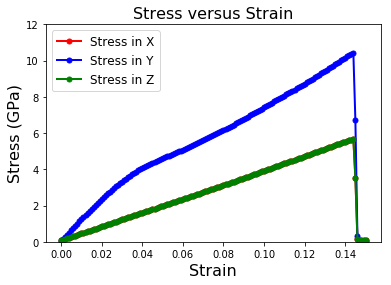

In [7]:
results2 = np.transpose(results)
plt.plot(results2[0],results2[1], '-or', label='Stress in X', lw=2, markersize = 5, mec = 'r', mfc = 'r')
plt.plot(results2[0],results2[2], '-ob', label='Stress in Y', lw=2, markersize = 5, mec = 'b', mfc = 'b')
plt.plot(results2[0],results2[3], '-og', label='Stress in Z', lw=2, markersize = 5, mec = 'g', mfc = 'g')
plt.xlabel('Strain',fontsize=16)
plt.ylabel('Stress (GPa)',fontsize=16)
plt.title('Stress versus Strain',fontsize=16)
plt.legend(fontsize=12)
plt.axis(aspect='equal')
plt.ylim(0,12)
plt.show()

Interesting.  Notice that the stress in y is increasing as the strain in the y-direction is applied, but the stress in the x- and z-directions are also increasing.  This is due to our constraint of fixing the simulation cell bounds in the x- and z- directions.  If we would allow the simulation cell to relax in the x- and z- directions as we are straining the configuration, it would likely take longer to fracture.  Try it out! 

***
## Step 4: Making the Deformation Movie 

Try making a few movies as explained [Tutorial 3](LAMMPS-Tutorials-03.ipynb) and [Tutorial 4](LAMMPS-Tutorials-04.ipynb).  For instance, try opening in AtomEye [2] or OVITO [3]. When you are finished, they should look like this:

<br>
<figure>
  <img src="https://icme.hpc.msstate.edu/mediawiki/images/a/a0/Fe_110_sig3_fracture.gif" width="300" title="Fracture of a Fe $<110>$ $\Sigma3(111)$ symmetric tilt grain boundary">
  <figcaption><br><strong>Figure 1.</strong> Movie showing the fracture of a Fe $<110>$ $\Sigma3(111)$ symmetric tilt grain boundary. Atoms are colored by the stress in the y-direction, "pyy".
</figcaption>
</figure>


***
## FAQs 

</br>
<div class="alert alert-danger">
    <strong>Question 1</strong>: None yet.  
</div>


***
## Links

* [Click here to open Tutorial 1](LAMMPS-Tutorials-01.ipynb)
* [Click here to open Tutorial 2](LAMMPS-Tutorials-02.ipynb)
* [Click here to open Tutorial 3](LAMMPS-Tutorials-03.ipynb)
* [Click here to open Tutorial 4](LAMMPS-Tutorials-04.ipynb)
* [Click here to open Tutorial 5](LAMMPS-Tutorials-05.ipynb)
* [Click here to open the next tutorial](LAMMPS-Tutorials-07.ipynb)

***
## References 

1. S. Plimpton, "Fast Parallel Algorithms for Short-Range Molecular Dynamics," J. Comp. Phys., 117, 1-19 (1995). 
1. J. Li, "AtomEye: an efficient atomistic configuration viewer," Modelling Simul. Mater. Sci. Eng. 11 (2003) 173. 
1. A. Stukowski, "Visualization and analysis of atomistic simulation data with OVITO – the Open Visualization Tool," Modelling Simul. Mater. Sci. Eng. 18 (2010) 015012.
1. D.J. Hepburn, and G.J. Ackland (2008), "[Metallic-covalent interatomic potential for carbon in iron](https://doi.org/10.1103/physrevb.78.165115)", Physical Review B, 78(16), 165115. 
1.  N R Rhodes, M A Tschopp, and K N Solanki, "[Quantifying the energetics and length scales of carbon segregation to α-Fe symmetric tilt grain boundaries using atomistic simulations](https://iopscience.iop.org/article/10.1088/0965-0393/21/3/035009/meta)," MSMSE 21(3) 2013.
1.  KN Solanki, MA Tschopp, MA Bhatia & NR Rhodes, "[Atomistic Investigation of the Role of Grain Boundary Structure on Hydrogen Segregation and Embrittlement in α-Fe](https://link.springer.com/article/10.1007/s11661-012-1430-z)," Metall. Mater. Transactions A, 44 (2013) 1365-1375.